In [44]:
#2024년 12월 3일
#commit 한 사람 : 이성은
#EDA 추가 보충 (좀 더 다양한 그래프 그려봄)

In [35]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
fifa_train = pd.read_csv("FIFA_train.csv")

전처리는 이전 버전과 동일하게 진행

In [19]:
fifa_train.drop(['id', 'name'], axis = 1, inplace = True)

In [5]:
def con_period(x):
    if x == 'Dec 31, 2018' :
        return '2019'
    elif x == 'Jun 30, 2020' :
        return '2020.5'
    elif x == 'Jun 30, 2019' :
        return '2019.5'
    elif x == 'May 31, 2020' :
        return '2020.3333'
    elif x == 'May 31, 2019' :
        return '2019.3333'
    elif x == 'Jan 31, 2019' :
        return '2019.0833'
    elif x == 'Jan 1, 2019' :
        return '2019'
    elif x == 'Jan 12, 2019' :
        return '2019.034'
    elif x == 'Dec 31, 2019' :
        return '2020'
    elif x == 'Jun 1, 2019' :
        return '2019.416'
    else :
        return x

In [6]:
#남은 계약기간을 최소 1로 만들기 위해 -2017씩 진행

fifa_train.contract_until = fifa_train.contract_until.apply(con_period).astype('float64')
fifa_train.contract_until -= 2017

In [11]:
plt.rcParams['font.family'] = 'NanumGothic'

In [21]:
# 상관 행렬 계산
correlation_matrix = fifa_train.corr(numeric_only=True)

그래프 추가

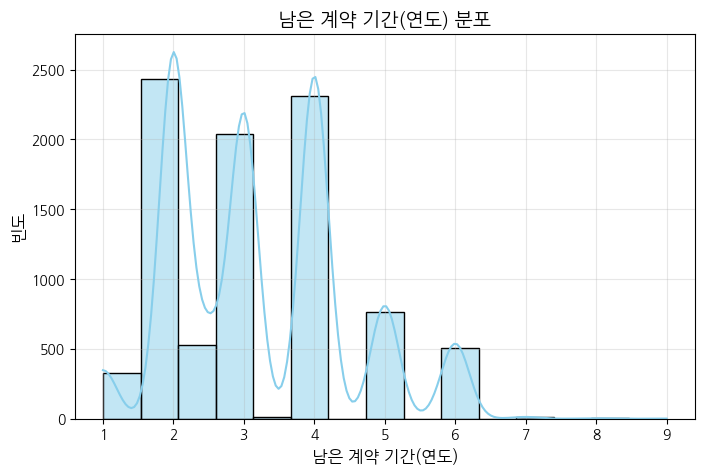

In [12]:
plt.figure(figsize=(8, 5))
sns.histplot(fifa_train['contract_until'], kde=True, bins=15, color='skyblue')
plt.title('남은 계약 기간(연도) 분포', fontsize=14)
plt.xlabel('남은 계약 기간(연도)', fontsize=12)
plt.ylabel('빈도', fontsize=12)
plt.grid(alpha=0.3)  # 배경 그리드 추가
plt.show()

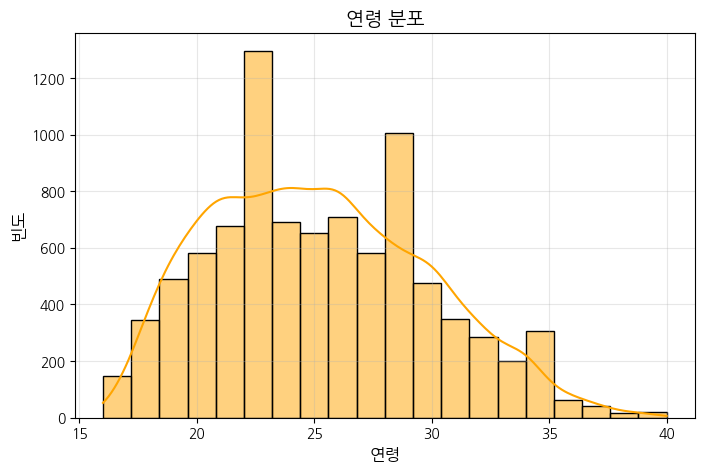

In [13]:
# 연령 분포 시각화
plt.figure(figsize=(8, 5))
sns.histplot(fifa_train['age'], kde=True, bins=20, color='orange')
plt.title('연령 분포', fontsize=14)
plt.xlabel('연령', fontsize=12)
plt.ylabel('빈도', fontsize=12)
plt.grid(alpha=0.3)  # 배경 그리드 추가
plt.show()

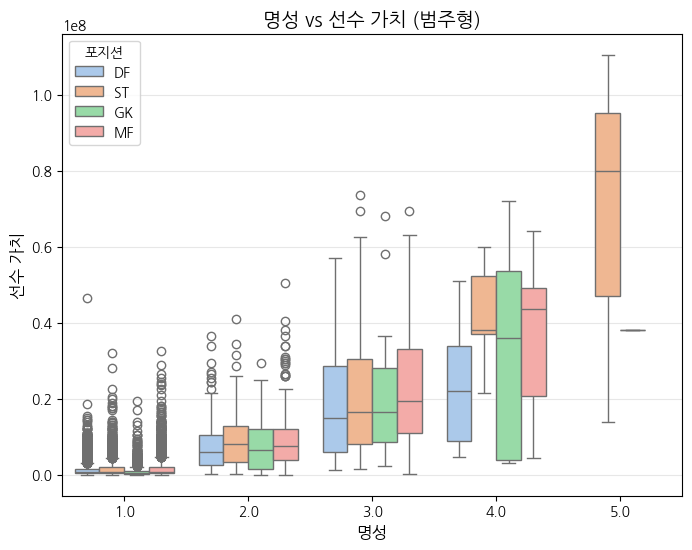

In [23]:
# 명성과 선수 가치의 관계 시각화
plt.figure(figsize=(8, 6))
sns.boxplot(x='reputation', y='value', hue='position', data=fifa_train, palette='pastel')
plt.title('명성 vs 선수 가치 (범주형)', fontsize=14)
plt.xlabel('명성', fontsize=12)
plt.ylabel('선수 가치', fontsize=12)
plt.grid(axis='y', alpha=0.3)  # 배경 그리드 추가
plt.legend(title='포지션')
plt.show()

C:\Users\이성은\AppData\Local\Temp\ipykernel_18868\2286808839.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x='reputation', data=fifa_train, palette='muted')


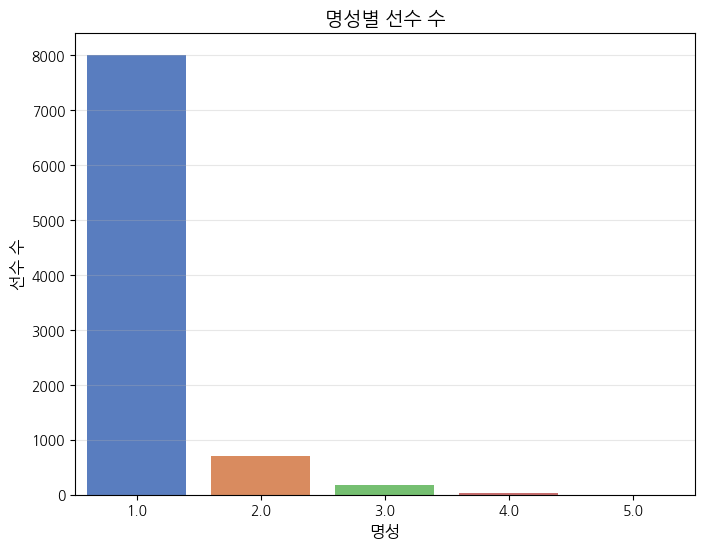

In [25]:
#명성별 선수 수(Bar Plot)
plt.figure(figsize=(8, 6))
sns.countplot(x='reputation', data=fifa_train, palette='muted')
plt.title('명성별 선수 수', fontsize=14)
plt.xlabel('명성', fontsize=12)
plt.ylabel('선수 수', fontsize=12)
plt.grid(axis='y', alpha=0.3)
plt.show()

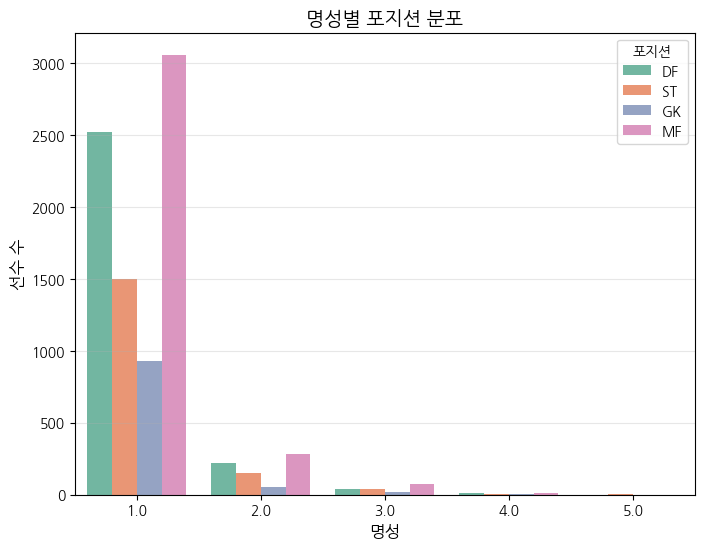

In [26]:
#명성별 포지션 분포(Bar Plot with Hue)
plt.figure(figsize=(8, 6))
sns.countplot(x='reputation', hue='position', data=fifa_train, palette='Set2')
plt.title('명성별 포지션 분포', fontsize=14)
plt.xlabel('명성', fontsize=12)
plt.ylabel('선수 수', fontsize=12)
plt.legend(title='포지션')
plt.grid(axis='y', alpha=0.3)
plt.show()

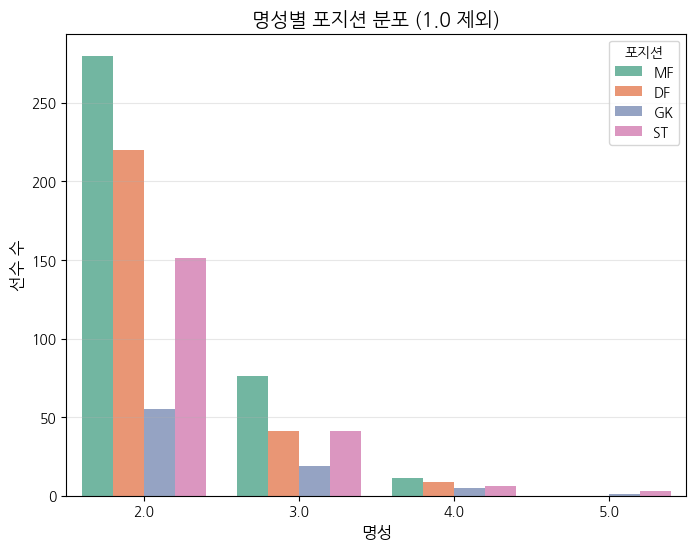

In [27]:
# 1.0인 선수 제거
fifa_filtered = fifa_train[fifa_train['reputation'] != 1.0]

# 명성별 포지션 분포(Bar Plot with Hue)
plt.figure(figsize=(8, 6))
sns.countplot(x='reputation', hue='position', data=fifa_filtered, palette='Set2')
plt.title('명성별 포지션 분포 (1.0 제외)', fontsize=14)
plt.xlabel('명성', fontsize=12)
plt.ylabel('선수 수', fontsize=12)
plt.legend(title='포지션')
plt.grid(axis='y', alpha=0.3)  # 배경 그리드 추가
plt.show()

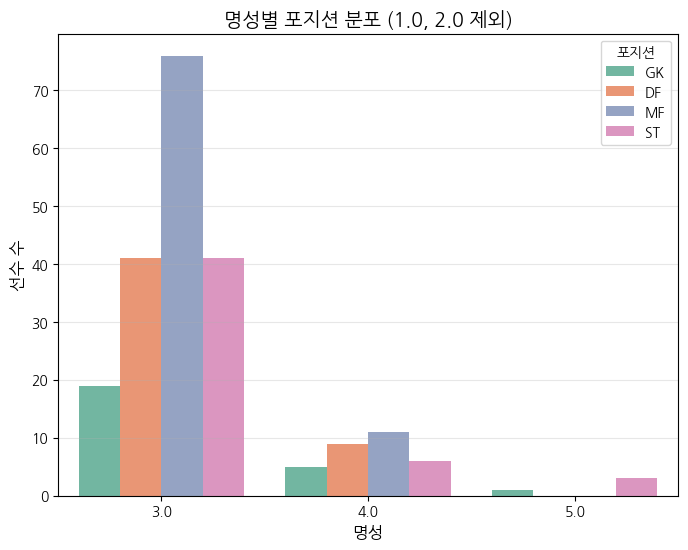

In [31]:
# 3.0이상 선수
fifa_filtered2 = fifa_train[(fifa_train['reputation'] != 1.0) & (fifa_train['reputation'] != 2.0)]

# 명성별 포지션 분포(Bar Plot with Hue)
plt.figure(figsize=(8, 6))
sns.countplot(x='reputation', hue='position', data=fifa_filtered2, palette='Set2')
plt.title('명성별 포지션 분포 (1.0, 2.0 제외)', fontsize=14)
plt.xlabel('명성', fontsize=12)
plt.ylabel('선수 수', fontsize=12)
plt.legend(title='포지션')
plt.grid(axis='y', alpha=0.3)  # 배경 그리드 추가
plt.show()

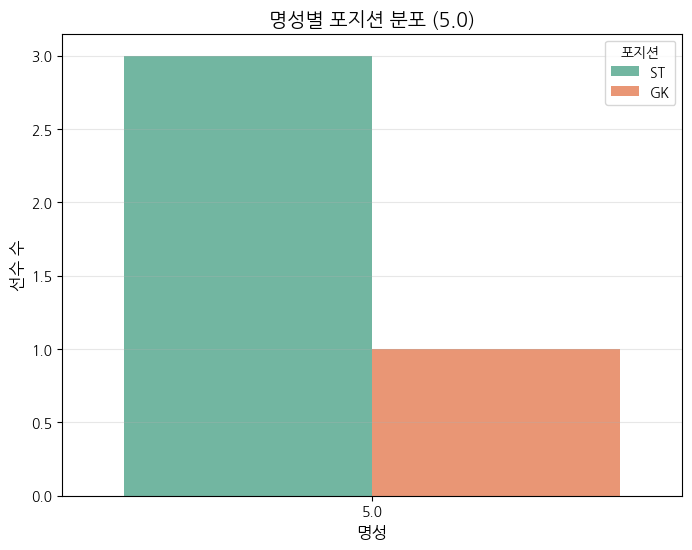

In [34]:
# 5.0선수
fifa_filtered3 = fifa_train[fifa_train['reputation'] == 5.0]

# 명성별 포지션 분포(Bar Plot with Hue)
plt.figure(figsize=(8, 6))
sns.countplot(x='reputation', hue='position', data=fifa_filtered3, palette='Set2')
plt.title('명성별 포지션 분포 (5.0)', fontsize=14)
plt.xlabel('명성', fontsize=12)
plt.ylabel('선수 수', fontsize=12)
plt.legend(title='포지션')
plt.grid(axis='y', alpha=0.3)  # 배경 그리드 추가
plt.show()

# 명성이 5.0인 train 데이터에서는 4명밖에

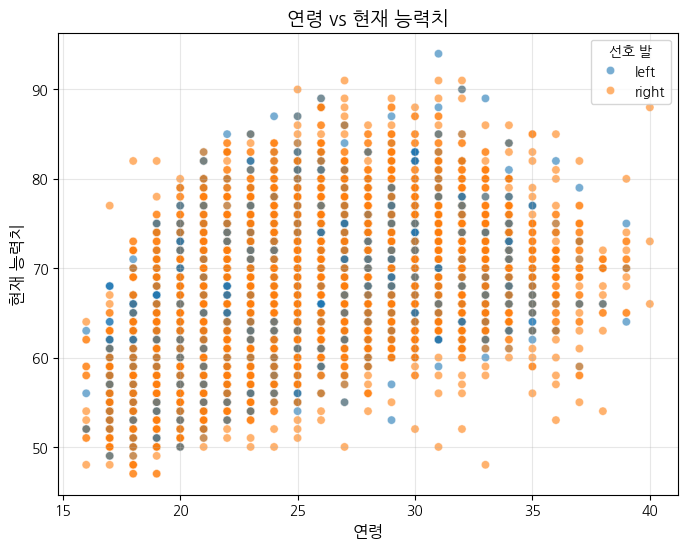

In [15]:
# 연령과 능력치의 관계 시각화
plt.figure(figsize=(8, 6))
sns.scatterplot(x=fifa_train['age'], y=fifa_train['stat_overall'], alpha=0.6, hue=fifa_train['prefer_foot'])
plt.title('연령 vs 현재 능력치', fontsize=14)
plt.xlabel('연령', fontsize=12)
plt.ylabel('현재 능력치', fontsize=12)
plt.grid(alpha=0.3)  # 배경 그리드 추가
plt.legend(title='선호 발')  # 범례 제목 추가
plt.show()

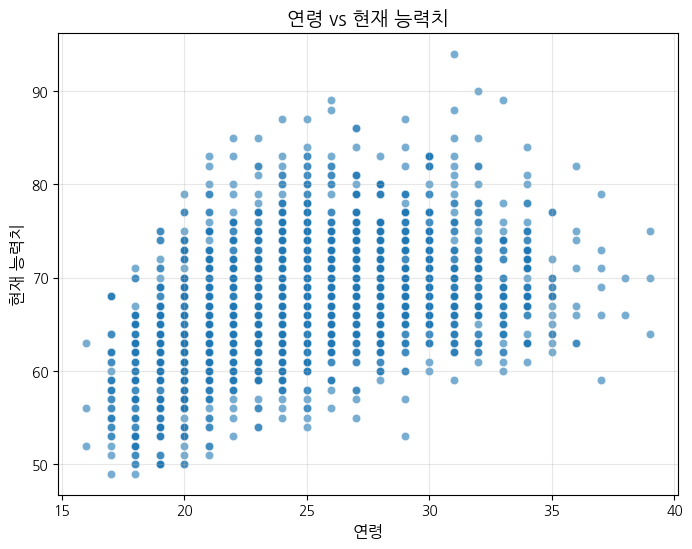

In [49]:
# 연령과 능력치의 관계 시각화 (왼발)
left_data = fifa_train[fifa_train['prefer_foot'] == 'left']

plt.figure(figsize=(8, 6))
sns.scatterplot(x=left_data['age'], y=left_data['stat_overall'], alpha=0.6)
plt.title('연령 vs 현재 능력치(왼발잡이)', fontsize=14)
plt.xlabel('연령', fontsize=12)
plt.ylabel('현재 능력치', fontsize=12)
plt.grid(alpha=0.3)  # 배경 그리드 추가
plt.show()

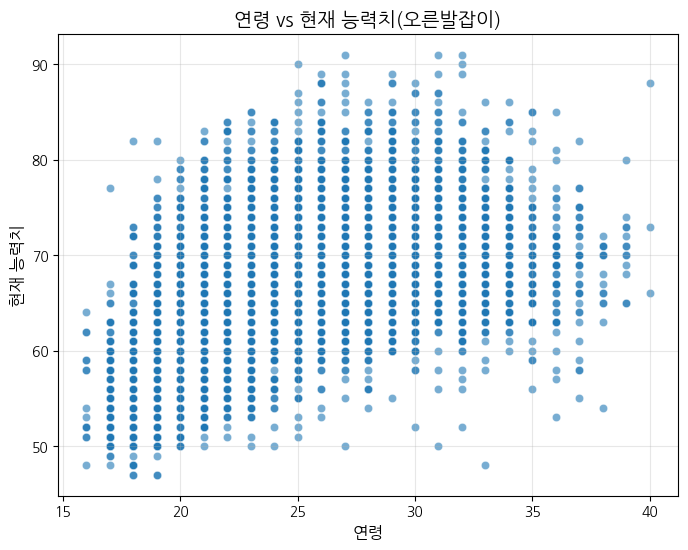

In [50]:
# 연령과 능력치의 관계 시각화 (오른발)
right_data = fifa_train[fifa_train['prefer_foot'] == 'right']

plt.figure(figsize=(8, 6))
sns.scatterplot(x=right_data['age'], y=right_data['stat_overall'], alpha=0.6)
plt.title('연령 vs 현재 능력치(오른발잡이)', fontsize=14)
plt.xlabel('연령', fontsize=12)
plt.ylabel('현재 능력치', fontsize=12)
plt.grid(alpha=0.3)  # 배경 그리드 추가
plt.show()

C:\Users\이성은\.conda\envs\sda2024\lib\site-packages\seaborn\utils.py:61: UserWarning: Glyph 8722 (\N{MINUS SIGN}) missing from current font.
  fig.canvas.draw()
C:\Users\이성은\.conda\envs\sda2024\lib\site-packages\IPython\core\pylabtools.py:152: UserWarning: Glyph 8722 (\N{MINUS SIGN}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)


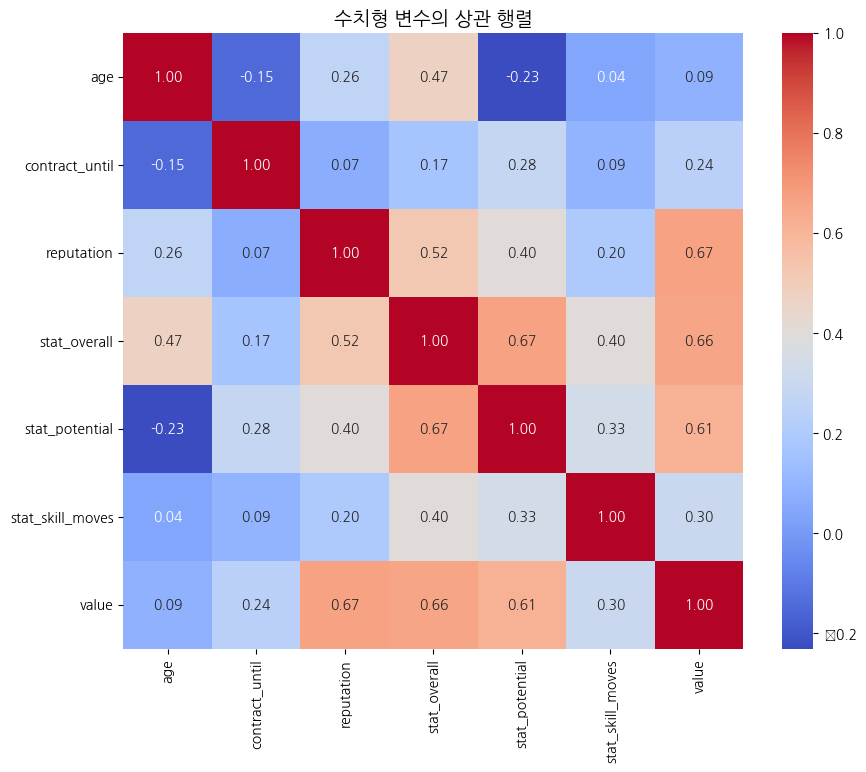

In [22]:
# 상관 행렬 히트맵 시각화
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt='.2f', cbar=True)
plt.title('수치형 변수의 상관 행렬', fontsize=14)
plt.show()

C:\Users\이성은\AppData\Local\Temp\ipykernel_18868\1588001633.py:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='position', y='value', data=position_value_mean, palette='Set2')


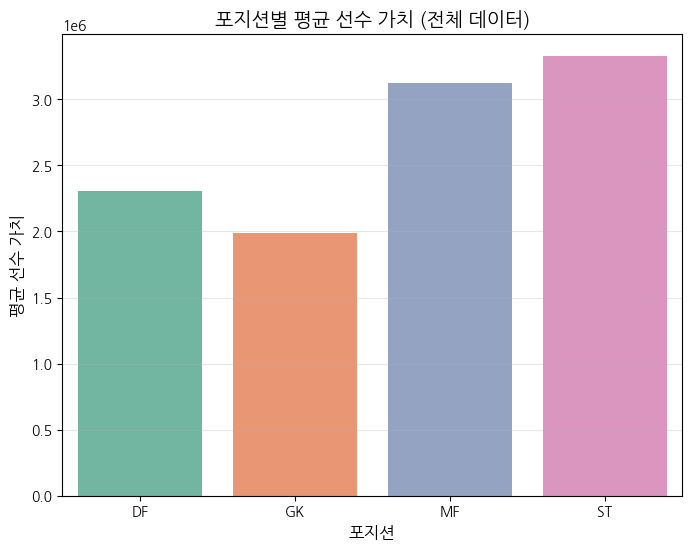

In [45]:
#포지션별 평균 선수 가치 (Bar Plot)
position_value_mean = fifa_train.groupby('position')['value'].mean().reset_index()
plt.figure(figsize=(8, 6))
sns.barplot(x='position', y='value', data=position_value_mean, palette='Set2')
plt.title('포지션별 평균 선수 가치 (전체 데이터)', fontsize=14)
plt.xlabel('포지션', fontsize=12)
plt.ylabel('평균 선수 가치', fontsize=12)
plt.grid(axis='y', alpha=0.3)
plt.show()

C:\Users\이성은\AppData\Local\Temp\ipykernel_18868\3114707359.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.stripplot(x='position', y='age', data=fifa_train, palette='Set3', size=5, jitter=True)


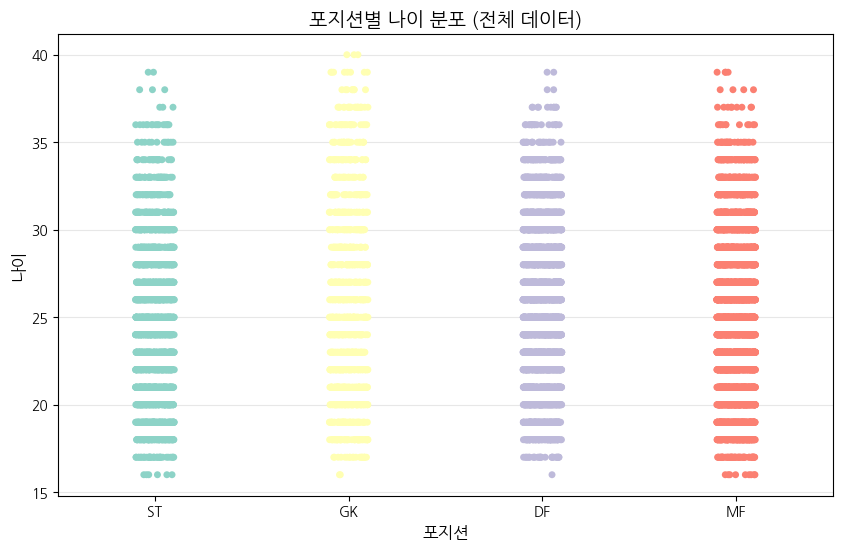

In [46]:
#포지션별 나이 분포 (Swarm Plot)
plt.figure(figsize=(10, 6))
sns.stripplot(x='position', y='age', data=fifa_train, palette='Set3', size=5, jitter=True)
plt.title('포지션별 나이 분포 (전체 데이터)', fontsize=14)
plt.xlabel('포지션', fontsize=12)
plt.ylabel('나이', fontsize=12)
plt.grid(axis='y', alpha=0.3)
plt.show()

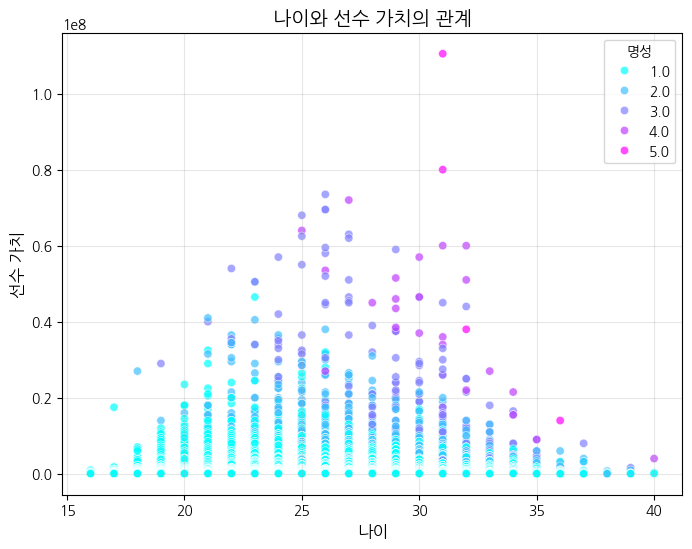

In [43]:
#나이와 선수 가치의 관계 (Scatter Plot)
plt.figure(figsize=(8, 6))
sns.scatterplot(x='age', y='value', hue='reputation', data=fifa_train, palette='cool', alpha=0.7)
plt.title('나이와 선수 가치의 관계', fontsize=14)
plt.xlabel('나이', fontsize=12)
plt.ylabel('선수 가치', fontsize=12)
plt.grid(alpha=0.3)
plt.legend(title='명성')
plt.show()